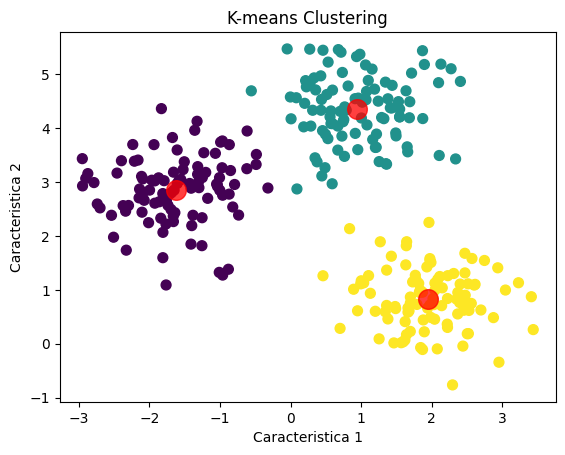

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Aplicar K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-means Clustering')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.show()


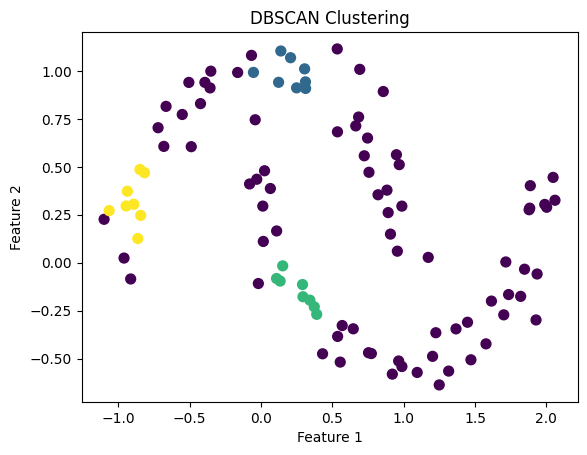

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
# Generar datos en forma de luna
X, _ = make_moons(n_samples=100, noise=0.1, random_state=0)
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=8)
y_dbscan = dbscan.fit_predict(X)
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

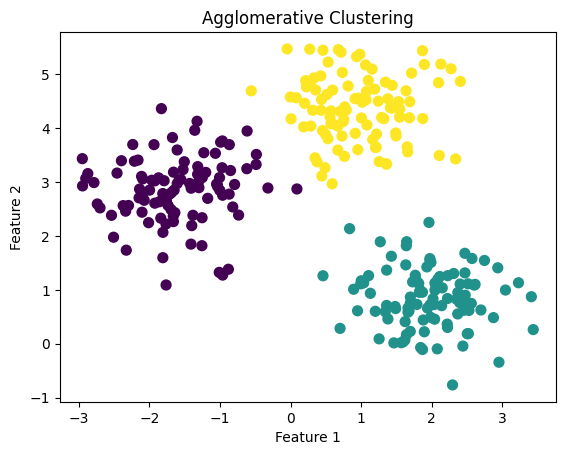

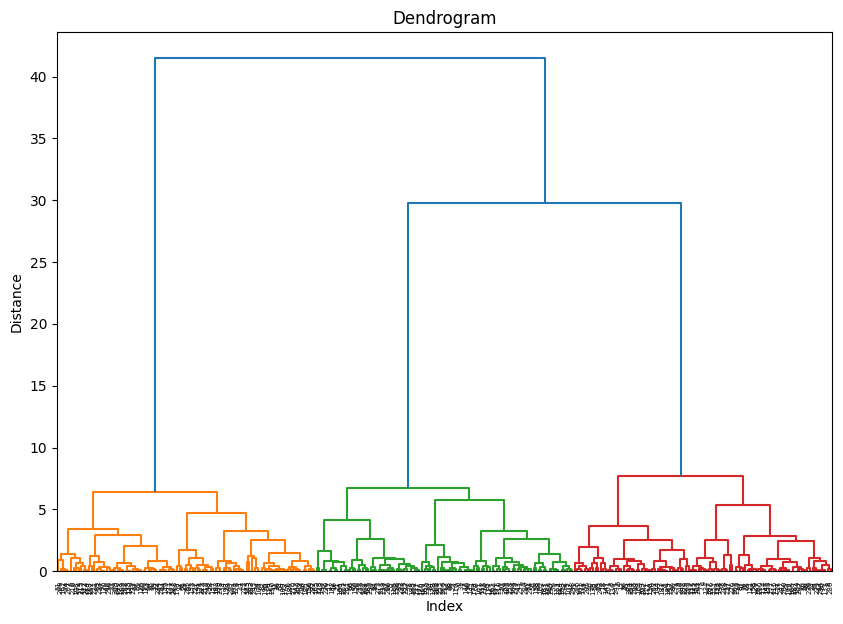

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Generar datos
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
# Crear el modelo de agrupamiento aglomerativo
agglo = AgglomerativeClustering(n_clusters=3)
y_agglo = agglo.fit_predict(X)
# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, s=50, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
# Crear el dendrograma
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


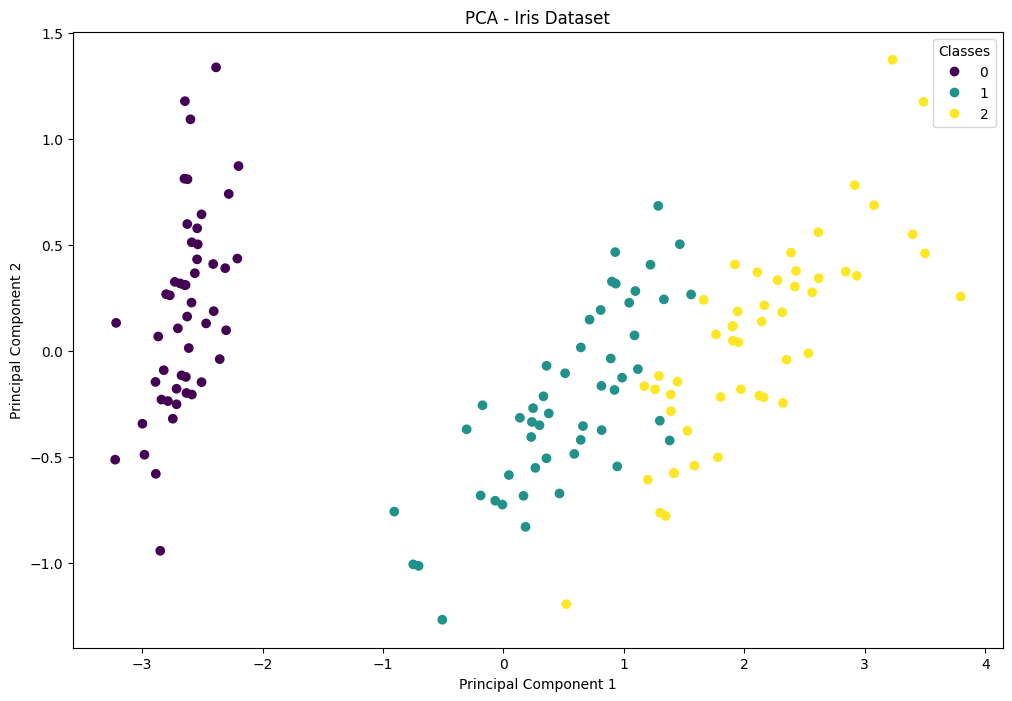

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
# Aplicar PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# Visualizar los resultados
plt.figure(figsize=(12, 8))
#mostrar los datos
df=pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.head())
#visualizar el grafico
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('PCA - Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

REDES NEURONALES


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Generar datos aleatorios
np.random.seed(69)
n_samples = 1000
#Generar fechas aleatorias en 2024
dates = pd.date_range(start="2024-01-01", end="2024-12-31", periods=n_samples)
#Generar temperaturas aleatorias (entre -10°C y 40°C)
temperatures = np.random.uniform(-10, 40, n_samples)
#Generar estados del clima en función de la temperatura
#Soleado: temp > 25, Nublado: 10 <= temp <= 25, Lluvioso: temp < 10
conditions = np.where(temperatures > 29, "soleado",
                      np.where(temperatures >= 11, "nublado", "lluvioso"))
#Humedad: desde el 0% hasta el 100%
stats = np.random.randint(20, 101, n_samples)
#Crear el DataFrame
data = pd.DataFrame({
    "fecha": dates,
    "temperatura": temperatures,
    "clima": conditions,
    "humedad": stats
})
#Convertir la columna 'fecha' en valores numéricos (para simplificar el modelo)
data['dia'] = data['fecha'].dt.dayofyear  # Día del año (1 a 365)
data.drop(columns="fecha", inplace=True)  # Eliminar la columna original de fechas
print(data.head())
#Codificar el clima (soleado=0, nublado=1, lluvioso=2)
encoder = LabelEncoder()
data['clima_encoded'] = encoder.fit_transform(data['clima'])
#Variables de entrada (día, temperatura, humedad) y salida (clima codificado)
X = data[['dia', 'temperatura', 'humedad']].values
y = data['clima_encoded'].values
#Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Escalar los datos de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Entrada ahora con tres características
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Salida: 3 clases (soleado, nublado, lluvioso)
])

#Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Entrenar el modelo
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
#Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Pérdida: {loss:.2f}, Precisión: {accuracy:.2%}")
#Realizar predicciones con humedad
new_data = np.array([
    [120, 15, 75],  # Día 120 del año, temperatura 15°C, humedad 75%
    [200, 30, 40],  # Día 200, temperatura 30°C, humedad 40%
    [300, -5, 85]])  # Día 300, temperatura -5°C, humedad 85%
#Escalar las nuevas entradas
new_data_scaled = scaler.transform(new_data)
#Realizar predicciones
predictions = model.predict(new_data_scaled)
#Convertir predicciones a etiquetas
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_classes)
#Mostrar los resultados
for i, pred in enumerate(predicted_labels):
    print(f"Entrada: Día {new_data[i][0]}, Temp {new_data[i][1]}°C, Humedad {new_data[i][2]}% => Clima predicho: {pred}")


   temperatura     clima  humedad  dia
0     4.812458  lluvioso       52    1
1    30.453386   soleado       22    1
2     7.512626  lluvioso       88    1
3    29.470463   soleado       23    2
4    18.067449   nublado       51    2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3900 - loss: 1.0714 - val_accuracy: 0.8500 - val_loss: 0.9265
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8327 - loss: 0.8858 - val_accuracy: 0.8800 - val_loss: 0.7098
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8600 - loss: 0.6869 - val_accuracy: 0.8800 - val_loss: 0.5026
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8732 - loss: 0.5093 - val_accuracy: 0.9050 - val_loss: 0.3667
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9068 - loss: 0.3756 - val_accuracy: 0.9250 - val_loss: 0.2834
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9284 - loss: 0.2970 - val_accuracy: 0.9500 - val_loss: 0.2353
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9242 - loss: 0.2543 - val_accuracy: 0.9450 - val_loss: 0.2015
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9345 - loss: 0.2242 - val_accuracy: 0.9550 - va

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Generar datos simulados
np.random.seed(42)
n_samples = 1000 # Número de muestras
# Generar horas aleatorias (de 0 a 23) y días de la semana (0 a 6)
hours = np.random.randint(0, 24, n_samples) # Horas del día (0 a 23)
days = np.random.randint(0, 7, n_samples)  # 0 = Lunes, 6 = Domingo
# Agregar eventos especiales (10% de probabilidad de evento por muestra)
events = np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1])
# Generar niveles de tráfico con nueva categoría "extremo"
conditions = np.where(
    ((hours >= 7) & (hours <= 9) | (hours >= 17) & (hours <= 19)) & (days < 5) & (events == 0), "alto",
    np.where((events == 1), "extremo",  # Eventos especiales causan tráfico extremo
    np.where((hours >= 10) & (hours <= 16) | (days >= 5), "moderado", "bajo"))  # Resto del tráfico
)
# Crear el DataFrame con los datos
data = pd.DataFrame({
    "hora": hours, # Hora del día
    "dia_semana": days, # Día de la semana
    "evento": events, # Evento especial
    "trafico": conditions  # Nivel de tráfico
})
# Preprocesar los datos
# Codificar el nivel de tráfico (bajo=0, moderado=1, alto=2, extremo=3)
encoder = LabelEncoder() # Inicializar codificador
data['trafico_encoded'] = encoder.fit_transform(data['trafico']) # Codificar etiquetas de tráfico
# Variables de entrada (hora, día de la semana, evento) y salida (tráfico codificado)
X = data[['hora', 'dia_semana', 'evento']].values # Características de entrada
y = data['trafico_encoded'].values # Etiquetas de salida
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalar los datos de entrada
scaler = StandardScaler() # Inicializar escalador
X_train = scaler.fit_transform(X_train) # Ajustar y transformar datos de entrenamiento
X_test = scaler.transform(X_test) # Transformar datos de prueba
# Crear y entrenar la red neuronal
# Crear el modelo
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),  # Entrada: hora, día de la semana, evento
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # Salida: 4 clases (bajo, moderado, alto, extremo)
])
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test)) # Ajustar el modelo a los datos
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test) # Calcular pérdida y precisión
print(f"Pérdida: {loss:.2f}, Precisión: {accuracy:.2%}") # Mostrar los resultados
# Realizar predicciones con formato de 24 horas
new_data = np.array([
    [8, 2, 0],  # Hora 8:00, Martes, sin evento
    [15, 6, 0],  # Hora 15:00, Domingo, sin evento
    [19, 4, 1]   # Hora 19:00, Viernes, con evento
])
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
# Convertir predicciones a etiquetas
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_classes)
# Mostrar resultados
for i, pred in enumerate(predicted_labels):
    print(f"Entrada: Hora={new_data[i, 0]}, Día={new_data[i, 1]}, Evento={new_data[i, 2]} => Tráfico predicho: {pred}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3865 - loss: 1.3251 - val_accuracy: 0.6150 - val_loss: 1.1811
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5917 - loss: 1.1499 - val_accuracy: 0.7150 - val_loss: 1.0178
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6991 - loss: 0.9776 - val_accuracy: 0.7100 - val_loss: 0.8716
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7145 - loss: 0.8523 - val_accuracy: 0.7150 - val_loss: 0.7714
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7095 - loss: 0.7594 - val_accuracy: 0.7850 - val_loss: 0.6925
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7520 - loss: 0.6922 - val_accuracy: 0.7900 - val_loss: 0.6357
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8000 - loss: 0.6070 - val_accuracy: 0.8000 - val_loss: 0.5896
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7923 - loss: 0.5891 - val_accuracy: 0.8050 - val_loss